In [82]:
import pandas as pd
import nltk

import seaborn as sns  
import matplotlib.pyplot as plt  

from nltk.stem.snowball import EnglishStemmer

# nltk.download('punkt')
# nltk.download('stopwords')

## Recupérer et explorer le corpus de textes

La première chose que je fais est de lire mon fichier d'entrée, lire la colonne description et rajouter deux colonnes:
- word_count > Compte le nombre total de mot dans la colonne description
- unique_word_count > Compte le nombre unique de mot dans la colonne description

J'affiche ensuite les 20 produits qui ont le plus de mots et je rajoute le nombre de mot unique.

In [11]:
df = pd.read_csv("./../input/flipkart_com-ecommerce_sample_1050.csv")

In [3]:
print(df.shape)
df.head()

(1050, 15)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [4]:
df = df[["product_name","product_category_tree", "description"]]
df.head()

,product_name,product_category_tree,description
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...


In [134]:
print("Description nul =",df["description"].isna().sum())
print("Category nul =",df["product_category_tree"].isna().sum())

Description nul = 0
Category nul = 0


In [87]:
def analyse_one_document(row):
    text = row["description"]
    
    # Only get alphanumerical characters
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    
    # Tokenize the text
    token_data = tokenizer.tokenize(text.lower())

    # Get the frequency of words
    frequency = nltk.FreqDist(token_data)
    
    # print(type(text))
    # print("Total values", len(token_data))
    # print(frequency)
    
    return (frequency, token_data)


In [88]:
for idx, item in df.iterrows():
    (frequency, token_data) = analyse_one_document(item)
    df.at[idx, 'word_count'] = len(token_data)
    df.at[idx, 'unique_word_count'] = len(frequency.keys())

In [89]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,word_count,unique_word_count
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",236.0,132.0
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",74.0,48.0
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",216.0,124.0
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",143.0,73.0
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",213.0,111.0


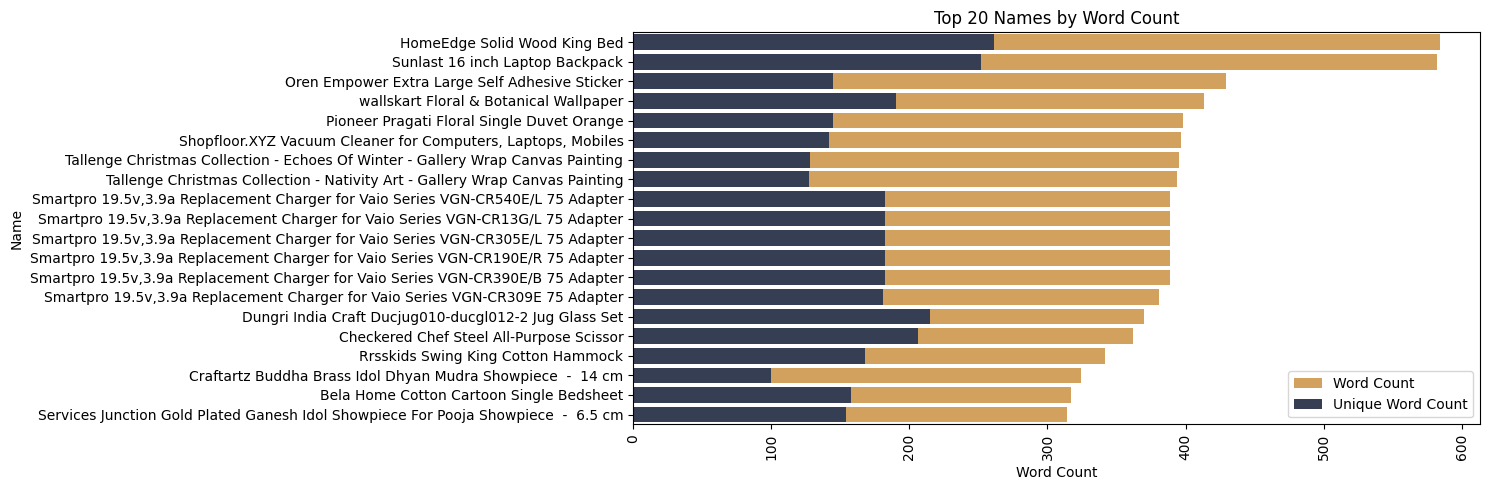

In [90]:
sorted_df = df.sort_values("word_count", ascending=False)    
top_names = sorted_df["product_name"].head(20)  
# top_names = [name[:60] + "..." if len(name) > 50 else name for name in top_names]    
  
top_word_counts = sorted_df["word_count"].head(20)  
top_unique_counts = sorted_df["unique_word_count"].head(20)  
  
plt.figure(figsize=(15, 5))  
  
# Create a horizontal barplot using seaborn    
sns.barplot(y=top_names, x=top_word_counts, orient="h",  color="#e7a44a", label="Word Count")    
sns.barplot(y=top_names, x=top_unique_counts, orient="h",  color="#313c59", label="Unique Word Count")    
  
# Set the title and axes labels    
plt.title("Top 20 Names by Word Count")    
plt.xlabel("Word Count")    
plt.ylabel("Name")    

# Rotate x-axis labels for better readability    
plt.xticks(rotation=90)
    
# Display the plot 
plt.legend()
plt.tight_layout()  
plt.show()  


## Nettoyer normaliser les données

Maintenant je supprime les mots le plus utilisés, je les repères d'abord grâce à la fonction nltk.Counter() et most_common.  
Puis je combine les 50 mots les plus commun avec les mots les plus commun de la langue anglaise par défaut compris dans la librairie nltk.corpus.stopwordsß

In [91]:
frequency_total = nltk.Counter()

for idx, item in df.iterrows():
    (frequency, token_data) = analyse_one_document(item)
    frequency_total += frequency

In [92]:
stop_words = frequency_total.most_common(200)

In [93]:
stop_words[:1]

[('of', 1751)]

In [94]:
stop_words = frequency_total.most_common(50)
sw = set()
default = nltk.corpus.stopwords.words("english")

sw.update([word for word, count in stop_words])
sw.update(tuple(default))

In [97]:
def analyse_one_document_without_stop_words(row, stop_words):
    text = row["description"]
    
    # Only get alphanumerical characters
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    
    # Tokenize the text
    token_data = [word for word in tokenizer.tokenize(text.lower()) if word not in stop_words]  

    # Get the frequency of words
    frequency = nltk.FreqDist(token_data)
    
    return (frequency, token_data)


Je test la différence sur le premier objet de mon dataframe

In [98]:
(frequency, token_data) = analyse_one_document(df.iloc[0])
print("OLD TOKEN DATA =", len(token_data))
print(token_data)
(frequency, token_data) = analyse_one_document_without_stop_words(df.iloc[0],sw)
print("NEW TOKEN DATA =", len(token_data))
print(token_data)


OLD TOKEN DATA = 236
['key', 'features', 'of', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'in', 'height', 'pack', 'of', '2', 'price', 'rs', '899', 'this', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiors', 'this', 'curtain', 'is', 'made', 'from', '100', 'high', 'quality', 'polyester', 'fabric', 'it', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'metal', 'ring', 'it', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'loving', 'this', 'curtain', 'is', 'ant', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparance', 'give', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs', 'the', 'surreal', 'attention', 'is', 'sure', 'to', 'steal', 'hearts', 'these', 'contemporary', 'eyelet', 'and', 'valance', 'curtains', 'slide', 'smoothly', 'so', 'when', 'you', 'd

J'affiche de nouveau le même graphique avec les nouvelles données

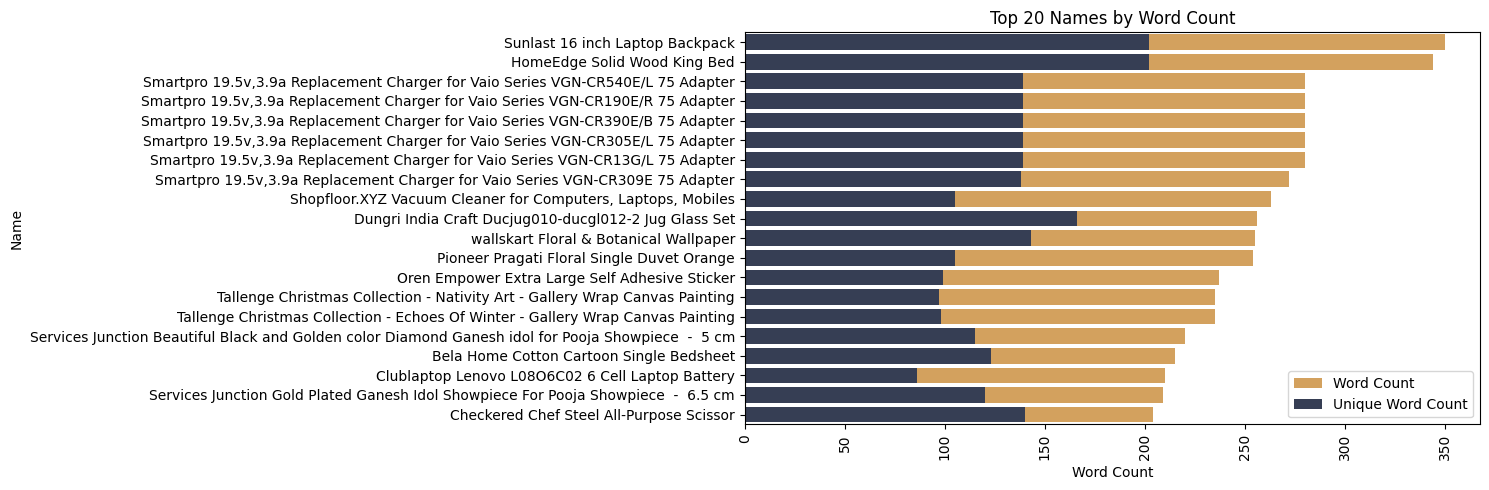

In [130]:
df2 = df.copy()
for idx, item in df.iterrows():
    (frequency, token_data) = analyse_one_document_without_stop_words(item, sw)
    df2.at[idx, 'word_count'] = len(token_data)
    df2.at[idx, 'unique_word_count'] = len(frequency.keys())
    
sorted_df = df2.sort_values("word_count", ascending=False)    
top_names = sorted_df["product_name"].head(20)  
# top_names = [name[:60] + "..." if len(name) > 50 else name for name in top_names]    
  
top_word_counts = sorted_df["word_count"].head(20)  
top_unique_counts = sorted_df["unique_word_count"].head(20)  
  
plt.figure(figsize=(15, 5))  
  
# Create a horizontal barplot using seaborn    
sns.barplot(y=top_names, x=top_word_counts, orient="h",  color="#e7a44a", label="Word Count")    
sns.barplot(y=top_names, x=top_unique_counts, orient="h",  color="#313c59", label="Unique Word Count")    
  
# Set the title and axes labels    
plt.title("Top 20 Names by Word Count")    
plt.xlabel("Word Count")    
plt.ylabel("Name")    

# Rotate x-axis labels for better readability    
plt.xticks(rotation=90)
    
# Display the plot 
plt.legend()
plt.tight_layout()  
plt.show()  


Maintenant j'utilise stemmer pour conserver que les mots sans leur conjugaison.

In [83]:
stemmer = EnglishStemmer()

In [102]:
(frequency, token_data) = analyse_one_document_without_stop_words(df.iloc[0],sw)
print("BEFORE STEMMER", token_data)
stemmed_tokens = [stemmer.stem(token) for token in token_data]
print("AFTER STEMMER", stemmed_tokens)

BEFORE STEMMER ['key', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'height', '2', '899', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', '100', 'high', 'quality', 'polyester', 'fabric', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'makes', 'room', 'environment', 'romantic', 'loving', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'designs', 'surreal', 'attention', 'sure', 'steal', 'hearts', 'contemporary', 'eyelet', 'valance', 'curtains', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'rays', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moments', 'joyous', 'beauty', 'given', 'soothing', 'prints', 'bring', 'home', 'elegant', 'curtain', 'softly', 'fi

Maintenant que j'ai mes mots non conjugés, je vais :
- recommencer l'étape de stop words en me basant sur un stemmer
- recréer le dataFrame avec ces nouvelles données
- afficher de nouveau le graphique

Je créer et utilise pour cela une fonction dans mon fichier de script Python qui sera réutilisable

In [128]:
stemmer = EnglishStemmer()

def set_word_counts_and_unique_words_counts(df):
    freq_total = nltk.Counter()

    # Get the frequency of each words
    for idx, item in df.iterrows():
        (frequency, token_data) = get_freq_and_token_with_stemmer(item)
        
        # Debug
        # if(idx == 1):
        #     print(len(token_data), token_data)
        
        freq_total += frequency
    
    # Create the stop words set
    stop_words = freq_total.most_common(50)
    sw = set()
    default = nltk.corpus.stopwords.words("english")
    sw.update([word for word, count in stop_words])
    sw.update(tuple(default))
    
    # Calculate the new frequency by removing stop_words
    for idx, item in df.iterrows():
        (frequency, token_data) = get_freq_and_token_with_stemmer(item, sw)
        freq_total += frequency
        
        # Debug
        # if(idx == 1):
        #     print(len(token_data), token_data)
        
        df.at[idx, 'word_count'] = len(token_data)
        df.at[idx, 'unique_word_count'] = len(frequency.keys())
    
# Get Frequency and Token (stop words optional)
def get_freq_and_token_with_stemmer(row, stop_words=None):
    text = row["description"]
    
    # Only get alphanumerical characters
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    
    
    token_data = tokenizer.tokenize(text.lower())
    token_data = [stemmer.stem(w) for w in token_data]
        
    # Tokenize the text
    if(stop_words):
        token_data = [word for word in token_data if word not in stop_words]  

    # Get the frequency of words
    frequency = nltk.FreqDist(token_data)
    
    return (frequency, token_data)

# Display graph of most common product
def display_graph_most_common_product(df):
    sorted_df = df.sort_values("word_count", ascending=False)    
    top_names = sorted_df["product_name"].head(20)  
    # top_names = [name[:60] + "..." if len(name) > 50 else name for name in top_names]    
    
    top_word_counts = sorted_df["word_count"].head(20)  
    top_unique_counts = sorted_df["unique_word_count"].head(20)  
    
    plt.figure(figsize=(15, 5))  
    
    # Create a horizontal barplot using seaborn    
    sns.barplot(y=top_names, x=top_word_counts, orient="h",  color="#e7a44a", label="Word Count")    
    sns.barplot(y=top_names, x=top_unique_counts, orient="h",  color="#313c59", label="Unique Word Count")    
    
    # Set the title and axes labels    
    plt.title("Top 20 Names by Word Count")    
    plt.xlabel("Word Count")    
    plt.ylabel("Name")    

    # Rotate x-axis labels for better readability    
    plt.xticks(rotation=90)
        
    # Display the plot 
    plt.legend()
    plt.tight_layout()  
    plt.show()  


74 ['specif', 'of', 'sathiya', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'featur', 'machin', 'washabl', 'yes', 'materi', 'cotton', 'design', 'self', 'design', 'general', 'brand', 'sathiya', 'type', 'bath', 'towel', 'gsm', '500', 'model', 'name', 'sathiya', 'cotton', 'bath', 'towel', 'ideal', 'for', 'men', 'women', 'boy', 'girl', 'model', 'id', 'asvtwl322', 'color', 'red', 'yellow', 'blue', 'size', 'mediam', 'dimens', 'length', '30', 'inch', 'width', '60', 'inch', 'in', 'the', 'box', 'number', 'of', 'content', 'in', 'sale', 'packag', '3', 'sale', 'packag', '3', 'bath', 'towel']
56 ['sathiya', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'machin', 'washabl', 'yes', 'self', 'general', 'brand', 'sathiya', 'bath', 'towel', 'gsm', '500', 'model', 'name', 'sathiya', 'bath', 'towel', 'ideal', 'men', 'women', 'boy', 'girl', 'model', 'id', 'asvtwl322', 'red', 'yellow', 'blue', 'size', 'mediam', 'dimens', 'length

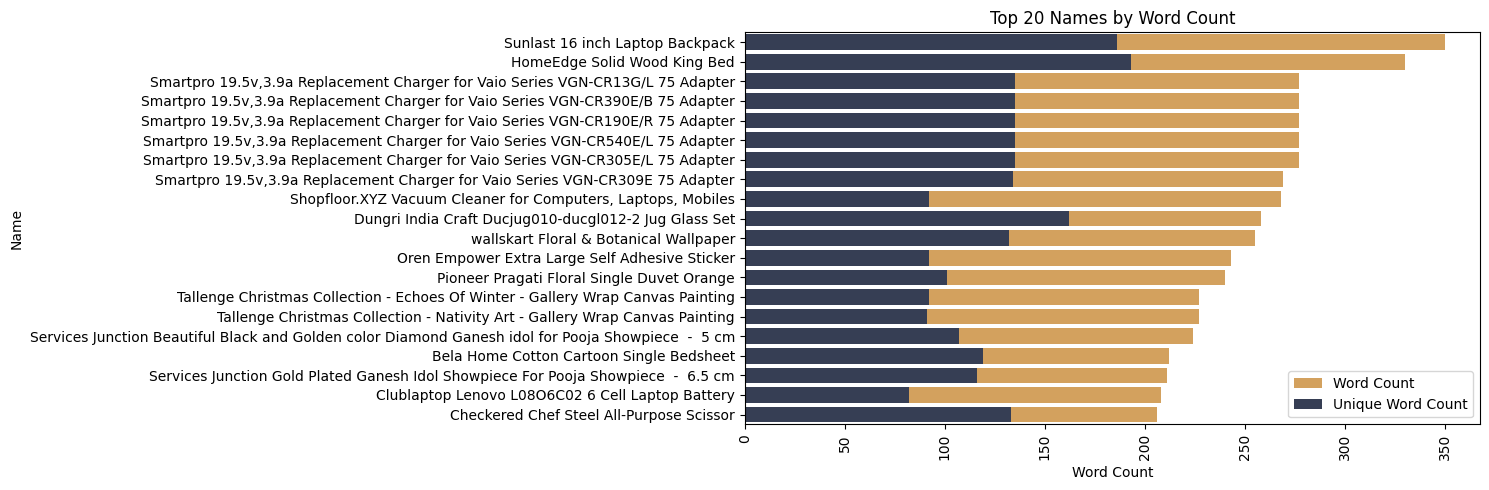

In [132]:
df3 = df.copy()
set_word_counts_and_unique_words_counts(df3)
display_graph_most_common_product(df3)